# Data Analyze

To process data properly, we need to analyze data


# Import Libraries


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Process Data

Frist, read CSV file and process it. Generate User-item pairs.


In [9]:
csv = pd.read_csv('../data/json_parsed.csv')

# Since pandas writes list as string, retrieve them
csv['links'] = csv.links.apply(lambda x: ast.literal_eval(x)[0])
csv['contributors'] = csv.contributors.apply(lambda x: ast.literal_eval(x)[0])
csv['category'] = csv.category.apply(lambda x: ast.literal_eval(x)[0])
csv['category_length'] = csv.category.apply(lambda x: len(x))
csv['link_length'] = csv.links.apply(lambda x: len(x))
redirect = csv[(csv.link_length == 1) & (csv.text.str.contains('redirect'))]

relink = {}

for index, row in redirect.iterrows():
    relink[row['title']] = row['links'][0]

diction = {}
category_transformer = {}
i = 0

for index, row in csv.iterrows():
    link = relink.get(row['title'])
    if link:
        # Since there are secondary redirected documents, explore non-redirect document
        while relink.get(link) is not None:
            if link == relink.get(link):
                break
            link = relink.get(link)

        if diction.get(link):
            diction[link].extend(row['contributors'])
        else:
            diction[link] = row['contributors']

        if category_transformer.get(link):
            category_transformer[link].extend(row['category'])
        else:
            category_transformer[link] = row['category']

    else:
        if diction.get(row['title']):
            diction[row['title']].extend(row['contributors'])
        else:
            diction[row['title']] = row['contributors']

        if category_transformer.get(row['title']):
            category_transformer[row['title']].extend(row['category'])
        else:
            category_transformer[row['title']] = row['category']

    i += 1

    if (i % 10000 == 0):
        print(f"processed {i}")

print('process done')

#processed = mpPandasObj(process_contributors, csv, numThreads=process_num, relink=relink)
#processed = pd.DataFrame(list(processed.items()), columns=['title', 'contributors'])
processed = pd.DataFrame(list(diction.items()), columns=['title', 'contributors'])
#processed['title'] = processed.title.apply(lambda x : category_transformer[x])

processed = processed.explode('contributors')

contributor_count = processed.groupby('title').count()
doc_count = processed.groupby('contributors').count()

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

# Data description

Simple description of data. We can check mean, std and qunatiles.


In [ ]:
contributor_count = contributor_count.sort_values('contributors' ,ascending=False)

contributor_count.head(10)

,contributors
title,
대한민국,2895
오락실/서울,2874
야스오(리그 오브 레전드),2847
D.Va,2613
오락실/경기/남부,2529
청해진해운 세월호 침몰 사고,2495
홍진호,2476
고양이,2395
북한,2347


Top 10 documents that are modified frequently. 

In [ ]:
contributor_count.describe()

,contributors
count,573334.000000
mean,42.142931
std,84.274899
min,1.000000
25%,7.000000
50%,16.000000
75%,41.000000
max,2895.000000


In [ ]:
doc_count = doc_count.sort_values('title' ,ascending=False)

doc_count.head(10)

,title
contributors,
namubot,308148
kiwitree2,283390
samduk,131879
albert_einstein,60745
owb101,41000
korhermit,37868
e080hsm,37528
49.163.93.241,26566
general9753,25977


Top 10 contributors. First and second are bots. After third is human. So we can see that the greatest contributor is samduk

In [ ]:
doc_count.describe()

,title
count,2.077510e+06
mean,1.163026e+01
std,3.376847e+02
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,4.000000e+00
max,3.081480e+05


## Histogram


array([[<AxesSubplot:title={'center':'contributors'}>]], dtype=object)

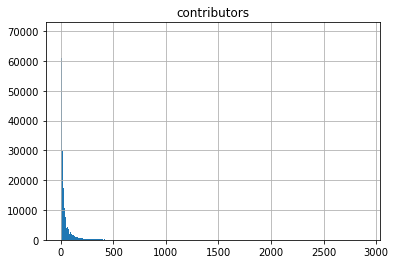

In [15]:
contributor_count.hist(bins=1000)

array([[<AxesSubplot:title={'center':'title'}>]], dtype=object)

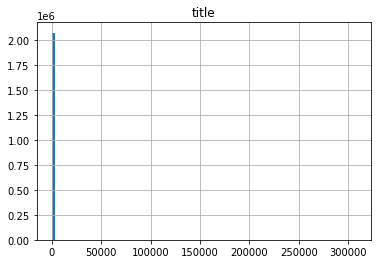

In [19]:
doc_count.hist(bins=100)

In [20]:
# To Pad categorical features, check max num of category of document

csv['category_length'].describe()

count    867023.000000
mean          1.579327
std           2.122671
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          42.000000
Name: category_length, dtype: float64